In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data with pandas
data = pd.read_csv('employee.csv')

In [3]:
# checking head of data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157.0,3,0,0,NaN,low,1
1,0.80,0.86,5,262.0,6,0,0,sales,NaN,1
2,0.11,0.88,7,272.0,4,0,0,sales,NaN,1
3,0.72,NaN,5,NaN,5,0,0,sales,low,1
4,0.37,0.52,2,159.0,3,0,0,sales,low,1


In [4]:
# check shape of data
data.shape

(14999, 10)

# 👉 Exploratory Data Analysis (EDA)

### Check Data Types

Return the dtypes in the DataFrame.

This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. See the User Guide for more.

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

### Check Info
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14998 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14998 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14998 non-null  object 
 8   salary                 14997 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


### Check Missing Values
Detect missing values for an array-like object.

This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

In [8]:
# check missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          1
number_project           0
average_montly_hours     1
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               1
salary                   2
left                     0
dtype: int64

### Summary Statistics
Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [9]:
# summary statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14998.0,0.716091,0.171170,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14998.0,201.048873,49.944443,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


### Pivot Table
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [10]:
data.pivot_table(index='left')

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
left,,,,,,,
0,0.175009,199.060203,0.715473,3.786664,0.026251,0.666810,3.380032
1,0.047326,207.414846,0.718070,3.855503,0.005321,0.440098,3.876505


### Target Value Counts
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [11]:
# check target balance
data['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

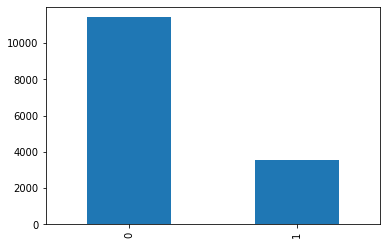

In [12]:
# bar plot
data['left'].value_counts().plot.bar();

### Analyze Target Variable on Features

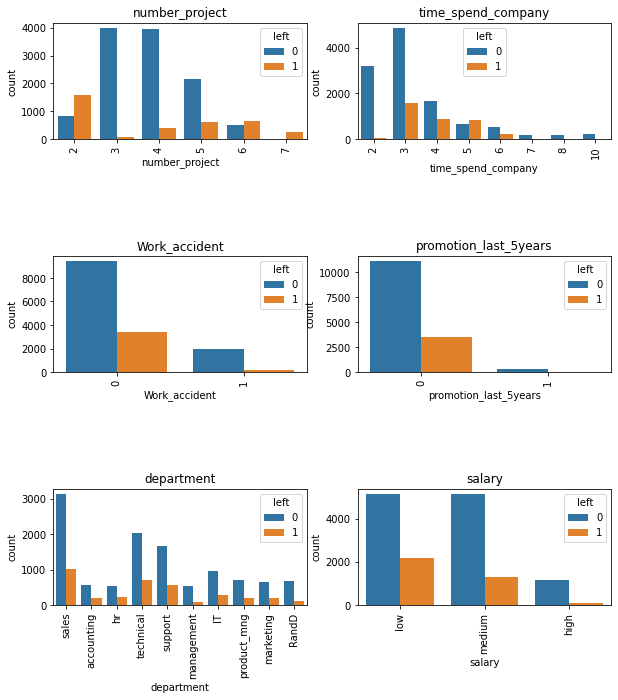

In [13]:
features = ['number_project','time_spend_company','Work_accident','promotion_last_5years','department','salary']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title(j)

# 👉 Data Preparation

### Train Test Split

In [14]:
X = data.drop(['left'], axis=1)
y = data['left']

In [15]:
# check X variable
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3,0,0,NaN,low
1,0.80,0.86,5,262.0,6,0,0,sales,NaN
2,0.11,0.88,7,272.0,4,0,0,sales,NaN
3,0.72,NaN,5,NaN,5,0,0,sales,low
4,0.37,0.52,2,159.0,3,0,0,sales,low


In [16]:
# check y variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 9), (10499,), (4500, 9), (4500,))

# Data Processing Pipeline

In [19]:
# numeric features
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
print(numeric_features)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [20]:
# categorical features
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(categorical_features)

['department', 'salary']


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [22]:
# build pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())])

In [23]:
# build pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [24]:
# fit numeric pipeline
numeric_pipeline.fit_transform(X_train.select_dtypes(include='number'))

array([[0.73626374, 0.171875  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.40659341, 0.21875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.2967033 , 0.890625  , 0.2       , ..., 0.375     , 0.        ,
        0.        ],
       ...,
       [0.7032967 , 0.921875  , 0.4       , ..., 0.5       , 0.        ,
        0.        ],
       [0.86813187, 0.234375  , 0.2       , ..., 0.625     , 0.        ,
        0.        ],
       [0.58241758, 0.859375  , 0.2       , ..., 0.125     , 0.        ,
        0.        ]])

In [25]:
# fit categorical pipeline 
categorical_pipeline.fit_transform(X_train.select_dtypes(include='object'))

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [26]:
from sklearn.compose import ColumnTransformer

data_pipeline = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [27]:
# fit entire data pipeline
data_pipeline.fit_transform(X_train)

array([[0.73626374, 0.171875  , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.40659341, 0.21875   , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2967033 , 0.890625  , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7032967 , 0.921875  , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.86813187, 0.234375  , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.58241758, 0.859375  , 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [28]:
# we can now use data_pipeline to transform X_train and X_test
X_train_transformed = data_pipeline.transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

In [29]:
X_train_transformed.shape, X_test_transformed.shape

((10499, 20), (4500, 20))

# Model Training: Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [33]:
# fit the model
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [34]:
# predict labels on X_test
y_pred = lr.predict(X_test_transformed)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# predict probability on X_test
y_pred_proba = lr.predict_proba(X_test_transformed)
y_pred_proba

array([[0.947415  , 0.052585  ],
       [0.94918898, 0.05081102],
       [0.94243387, 0.05756613],
       ...,
       [0.83949115, 0.16050885],
       [0.85369042, 0.14630958],
       [0.52435228, 0.47564772]])

# Model Evaluation: Logistic Regression

In [36]:
# accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7902222222222223

In [37]:
# AUC on test set
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:,1])

0.819135897773127

In [38]:
# recall on test set
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.33053221288515405

In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3202  227]
 [ 717  354]]


In [40]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3429
           1       0.61      0.33      0.43      1071

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



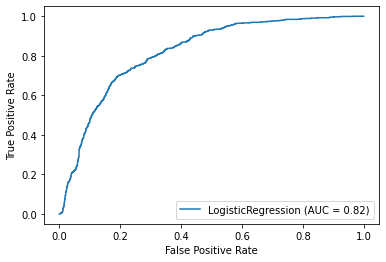

In [41]:
# AUC plot
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test_transformed, y_test)

# Model Training: Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(probability=True)

In [44]:
# fit the model
svm.fit(X_train_transformed, y_train)

SVC(probability=True)

In [45]:
# predict labels on X_test
y_pred = svm.predict(X_test_transformed)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# predict probability on X_test
y_pred_proba = svm.predict_proba(X_test_transformed)
y_pred_proba

array([[0.98574726, 0.01425274],
       [0.98854274, 0.01145726],
       [0.99722276, 0.00277724],
       ...,
       [0.96568335, 0.03431665],
       [0.9945678 , 0.0054322 ],
       [0.70997669, 0.29002331]])

# Model Evaluation: Support Vector Machine

In [47]:
# accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9344444444444444

In [48]:
# AUC on test set
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:,1])

0.957836833576631

In [49]:
# recall on test set
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8524743230625583

In [50]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3292  137]
 [ 158  913]]


In [51]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3429
           1       0.87      0.85      0.86      1071

    accuracy                           0.93      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.93      0.93      0.93      4500



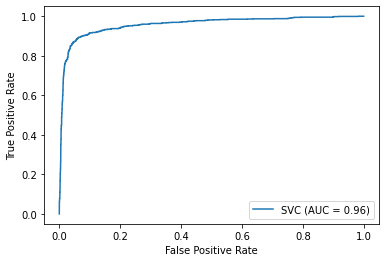

In [52]:
# AUC plot
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm, X_test_transformed, y_test)

# We can also add Model in Pipeline (to make it more clean)

## Logistic Regression Pipeline

In [53]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [54]:
lr_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', lr_model)])

In [55]:
lr_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
             

In [56]:
from sklearn import set_config
set_config(display='diagram')

In [57]:
lr_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', LogisticRegression())])

In [58]:
# fit pipeline with model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', LogisticRegression())])

In [59]:
# predictions from pipeline
y_pred = lr_pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# accuracy on test set using lr_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7902222222222223

In [61]:
# confusion matrix from lr_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3202  227]
 [ 717  354]]


## Support Vector Machine Pipeline

In [62]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)

In [63]:
svm_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', svm_model)])

In [64]:
# fit pipeline with model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', SVC(probability=True))])

In [65]:
# predictions from pipeline
y_pred = svm_pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# accuracy on test set using svm_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9344444444444444

In [67]:
# confusion matrix from svm_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3292  137]
 [ 158  913]]


## Random Forest Pipeline

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [69]:
rf_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', rf_model)])

In [70]:
# fit pipeline with model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', RandomForestClassifier())])

In [71]:
# predictions from pipeline
y_pred = rf_pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
# accuracy on test set using rf_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9893333333333333

In [73]:
# confusion matrix from rf_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3417   12]
 [  36 1035]]


## K Nearest Neighbour Pipeline

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [75]:
knn_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', knn_model)])

In [76]:
# fit pipeline with model
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', KNeighborsClassifier())])

In [77]:
# predictions from pipeline
y_pred = knn_pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [78]:
# accuracy on test set using knn_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9366666666666666

In [79]:
# confusion matrix from knn_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3268  161]
 [ 124  947]]


# Save Sklearn Model / Pipeline

In [80]:
from joblib import dump
dump(knn_pipeline, 'knn_pipeline_sklearn.pkl') 

['knn_pipeline_sklearn.pkl']

# Load Sklearn Model / Pipeline

In [81]:
from joblib import load
loaded_knn_pipeline = load('knn_pipeline_sklearn.pkl') 

In [84]:
loaded_knn_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['department', 'salary'])])),
                ('model', KNeighborsClassifier())])